In [1]:
!pip install yfinance


     ---------------------------------------- 0.0/948.2 kB ? eta -:--:--
     ------------------------------------- 948.2/948.2 kB 11.1 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ------------------------------ --------- 2.9/3.8 MB 14.0 MB/s eta 0:00:01
   ---------------------------------------- 3.8/3.8 MB 14.2 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.8-py3-none-any.whl size=139012 sha256=119b72318529243fd254a8cd5bd6907ee8384f07bdf8cdbe8f0b67389e68486f
  Stored in directory: c:\users\karth\appdata\local\pip\cache\wheels\8f\65\34\456800445efeafb05164fe95285c70e81ba1d96bae30f43917
Successfully 

In [137]:
import yfinance as yf


tesla = yf.Ticker("TSLA")

tesla_data = tesla.history(period="max")

tesla_data.reset_index(inplace=True)
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [5]:
tesla_data.to_csv('tesla_data.csv', index=False)  

In [139]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [141]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text

In [142]:
soup = BeautifulSoup(html_data, "html.parser")



In [143]:
# Create a DataFrame to store Tesla revenue data
tesla_revenue = pd.DataFrame(columns=['Date', 'Revenue'])


# Iterate over all tables in the parsed HTML
for table in soup.find_all('table'):
    # Check if the table contains "Tesla Quarterly Revenue" in its header
    if 'Tesla Quarterly Revenue' in table.find('th').text:
        rows = table.find_all('tr')  # Get all rows in the table

        # Iterate over each row to extract data
        for row in rows:
            col = row.find_all('td')  # Find all columns in the row
            if col:  # Skip rows without data
                date = col[0].text.strip()  # Extract the date
                revenue = col[1].text.strip().replace(',', '').replace('$', '')  # Clean the revenue

                # Append the data to the DataFrame
                tesla_revenue = pd.concat(
                    [tesla_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})],
                    ignore_index=True
                )



In [147]:
# Clean the Revenue column
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(r'[^\d.]', '', regex=True)



In [149]:
# Drop rows with missing or empty revenue data
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [153]:
tesla_revenue.tail()

,Date,Revenue


In [109]:
GameStop = yf.Ticker("GME")

gme_data = GameStop.history(period="max")

gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603296,1.662209,6892800,0.0,0.0


In [113]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

html_data  = requests.get(url).text


In [115]:

soup = BeautifulSoup(html_data,"html5lib")

In [133]:
gme_revenue_list = []  # Create a list to store rows as dictionaries

for table in soup.find_all('table'):
    if 'GameStop Quarterly Revenue' in table.find('th').text:
        rows = table.find_all('tr')
        
        for row in rows:
            col = row.find_all('td')
            if col != []:
                date = col[0].text.strip()
                revenue = col[1].text.replace(',', '').replace('$', '').strip()
                
                # Append the data to the list
                gme_revenue_list.append({"Date": date, "Revenue": revenue})

# Create a DataFrame from the list
gme_revenue = pd.DataFrame(gme_revenue_list)


In [135]:
gme_revenue.tail()


,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


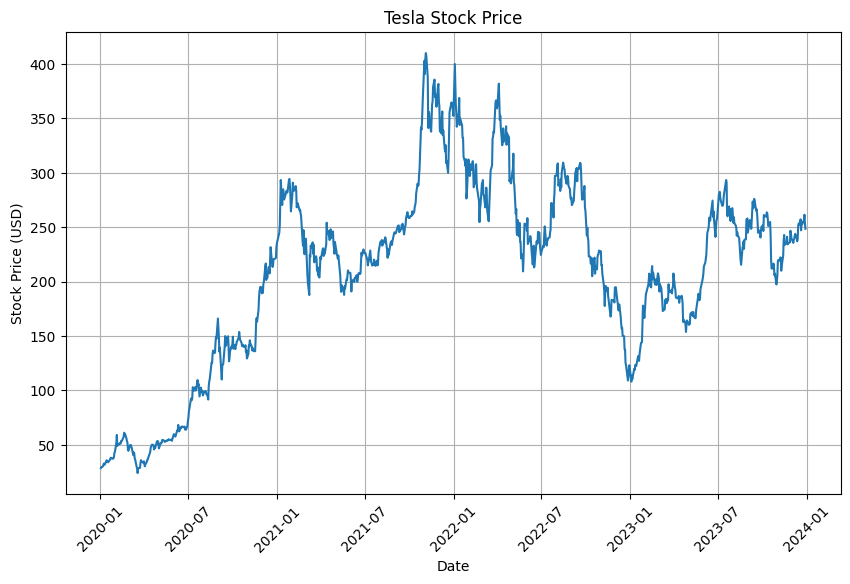

In [129]:
make_graph(tesla_data, 'Tesla Stock Price')

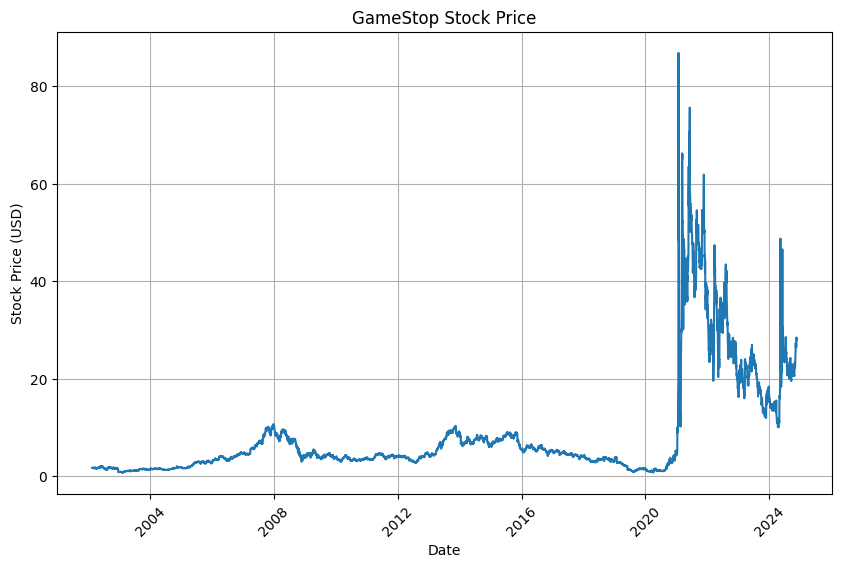

In [131]:
make_graph(gme_data, 'GameStop Stock Price')

